In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

churn_modeling = pd.read_csv("C:/Users/USER/Desktop/data_set.csv")
hidden= pd.read_csv('C:/Users/USER/Downloads/churn_modeling_test_hidden.csv')

churn_modeling

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9799,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9800,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9801,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9802,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [2]:
#remove col is not required
del churn_modeling["RowNumber"]
del churn_modeling["CustomerId"]
del churn_modeling["Surname"]
print(churn_modeling)

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9799          771    France    Male   39       5       0.00              2   
9800          516    France    Male   35      10   57369.61              1   
9801          709    France  Female   36       7       0.00              1   
9802          772   Germany    Male   42       3   75075.31              2   
9803          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0   

In [3]:
#DATA ANALSIS & VISUALIZE THE DATASET
churn_modeling.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
churn_modeling.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9804.000000,9804.000000,9804.000000,9804.000000,9804.000000,9804.000000,9804.000000,9804.000000,9804.000000
mean,650.535598,38.916157,5.014994,76567.289547,1.528458,0.705426,0.514892,100033.740389,0.202060
std,96.663725,10.478353,2.893548,62423.278032,0.581171,0.455874,0.499804,57569.646657,0.401558
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50904.965000,0.000000
50%,652.000000,37.000000,5.000000,97277.130000,1.000000,1.000000,1.000000,100129.330000,0.000000
75%,718.000000,44.000000,8.000000,127676.242500,2.000000,1.000000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [5]:
churn_modeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9804 entries, 0 to 9803
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9804 non-null   int64  
 1   Geography        9804 non-null   object 
 2   Gender           9804 non-null   object 
 3   Age              9804 non-null   int64  
 4   Tenure           9804 non-null   int64  
 5   Balance          9804 non-null   float64
 6   NumOfProducts    9804 non-null   int64  
 7   HasCrCard        9804 non-null   int64  
 8   IsActiveMember   9804 non-null   int64  
 9   EstimatedSalary  9804 non-null   float64
 10  Exited           9804 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 842.7+ KB


In [6]:
churn_modeling.corr().style.background_gradient(cmap='coolwarm')

C:\Users\USER\AppData\Local\Temp\ipykernel_23984\798337200.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  churn_modeling.corr().style.background_gradient(cmap='coolwarm')


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.004520,0.001321,0.006853,0.011634,-0.006207,0.028376,-0.003904,-0.027098
Age,-0.004520,1.000000,-0.008545,0.027715,-0.031033,-0.014503,0.085981,-0.006397,0.287024
Tenure,0.001321,-0.008545,1.000000,-0.013539,0.014032,0.022373,-0.027487,0.008596,-0.013933
Balance,0.006853,0.027715,-0.013539,1.000000,-0.304035,-0.017589,-0.009896,0.013901,0.116786
NumOfProducts,0.011634,-0.031033,0.014032,-0.304035,1.000000,0.004692,0.009603,0.012209,-0.050213
HasCrCard,-0.006207,-0.014503,0.022373,-0.017589,0.004692,1.000000,-0.011189,-0.011352,-0.008609
IsActiveMember,0.028376,0.085981,-0.027487,-0.009896,0.009603,-0.011189,1.000000,-0.009785,-0.157056
EstimatedSalary,-0.003904,-0.006397,0.008596,0.013901,0.012209,-0.011352,-0.009785,1.000000,0.011076
Exited,-0.027098,0.287024,-0.013933,0.116786,-0.050213,-0.008609,-0.157056,0.011076,1.000000


In [7]:
churn_modeling.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_23984\1115206633.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  churn_modeling.corr()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.004520,0.001321,0.006853,0.011634,-0.006207,0.028376,-0.003904,-0.027098
Age,-0.004520,1.000000,-0.008545,0.027715,-0.031033,-0.014503,0.085981,-0.006397,0.287024
Tenure,0.001321,-0.008545,1.000000,-0.013539,0.014032,0.022373,-0.027487,0.008596,-0.013933
Balance,0.006853,0.027715,-0.013539,1.000000,-0.304035,-0.017589,-0.009896,0.013901,0.116786
NumOfProducts,0.011634,-0.031033,0.014032,-0.304035,1.000000,0.004692,0.009603,0.012209,-0.050213
HasCrCard,-0.006207,-0.014503,0.022373,-0.017589,0.004692,1.000000,-0.011189,-0.011352,-0.008609
IsActiveMember,0.028376,0.085981,-0.027487,-0.009896,0.009603,-0.011189,1.000000,-0.009785,-0.157056
EstimatedSalary,-0.003904,-0.006397,0.008596,0.013901,0.012209,-0.011352,-0.009785,1.000000,0.011076
Exited,-0.027098,0.287024,-0.013933,0.116786,-0.050213,-0.008609,-0.157056,0.011076,1.000000


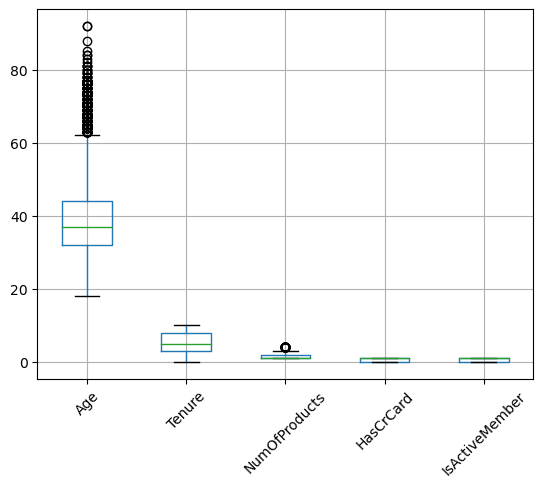

In [8]:
churn_modeling.drop(['Balance','EstimatedSalary','CreditScore','Exited'], axis= 1).boxplot()
plt.xticks(rotation=45)
plt.show()

In [9]:
#outliers
for x in ['Age']:
    q75,q25 = np.percentile(churn_modeling.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    churn_modeling.loc[churn_modeling[x] < min,x] = np.nan
    churn_modeling.loc[churn_modeling[x] > max,x] = np.nan
churn_modeling

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9799,771,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9800,516,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9801,709,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9802,772,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1


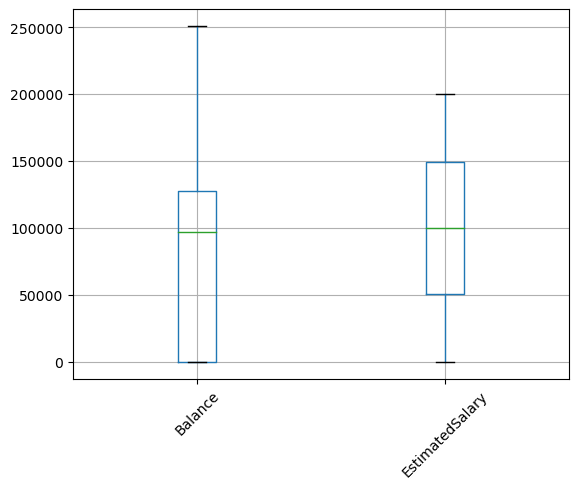

In [10]:
cols =churn_modeling.columns
churn_modeling.drop([str(x) for x in cols if x not in ['Balance','EstimatedSalary']], axis= 1).boxplot()
plt.xticks(rotation=45)
plt.show()

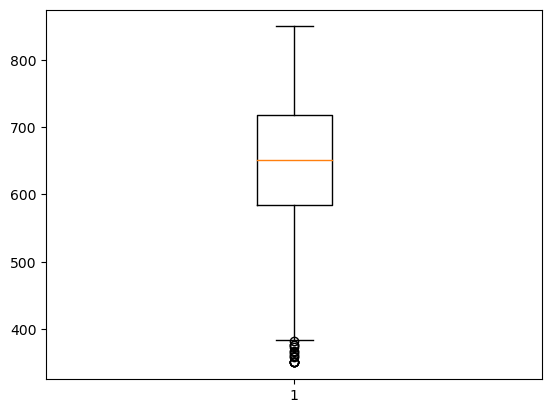

In [11]:
plt.boxplot(churn_modeling.CreditScore)
plt.show()

In [12]:
#outliers
for x in ['CreditScore']:
    q75,q25 = np.percentile(churn_modeling.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    churn_modeling.loc[churn_modeling[x] < min,x] = np.nan
    churn_modeling.loc[churn_modeling[x] > max,x] = np.nan
churn_modeling

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850.0,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9799,771.0,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9800,516.0,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9801,709.0,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9802,772.0,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1


In [13]:
print(churn_modeling.isnull().sum())
churn_modeling.dropna(axis=0,inplace=True)
print(churn_modeling.isnull().sum())
churn_modeling

CreditScore         15
Geography            0
Gender               0
Age                351
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850.0,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9799,771.0,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9800,516.0,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9801,709.0,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9802,772.0,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1


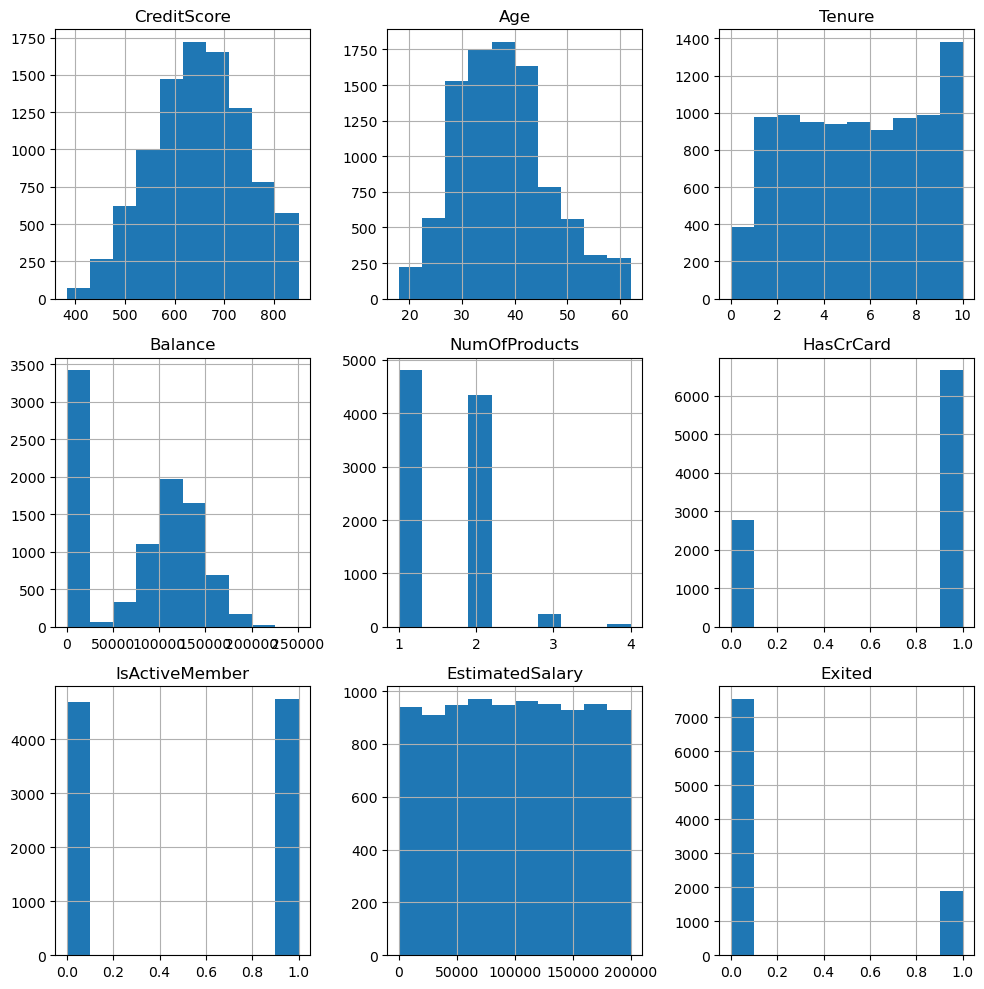

In [14]:
churn_modeling.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


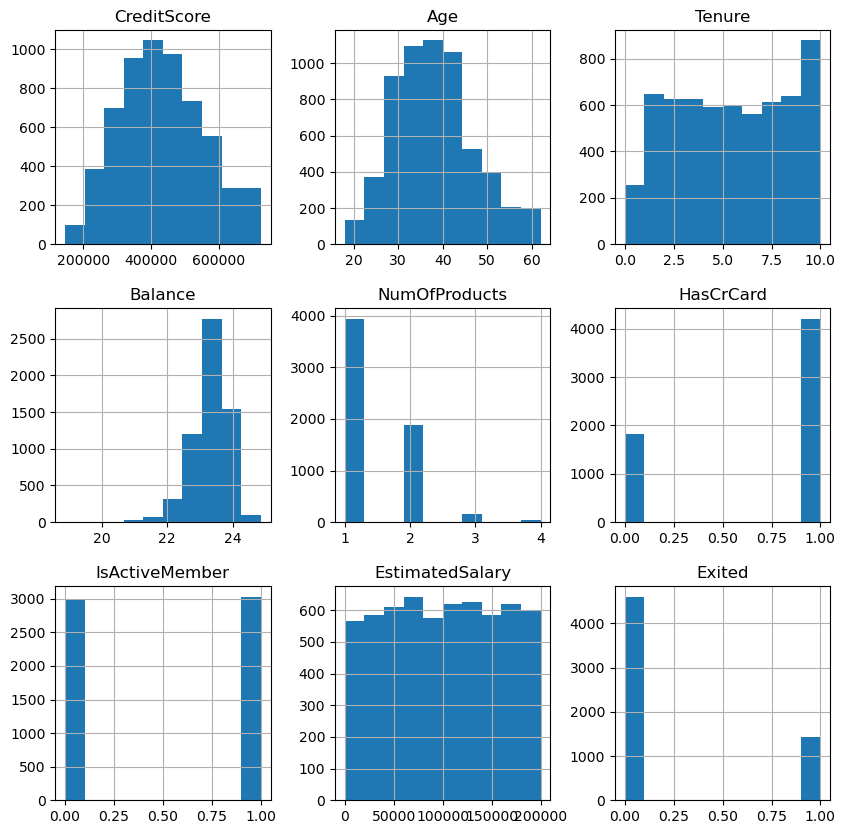

In [15]:
CM= churn_modeling.copy()

CM['Balance'] = np.power(CM['Balance'], 2)
CM['Balance'] = np.log(CM['Balance'])
CM['CreditScore'] = np.power(CM['CreditScore'], 2)
CM.drop(CM[np.abs(CM['Balance']) == np.inf].index, inplace=True)
CM.hist(figsize=(10,10))
plt.show()

In [17]:
from sklearn.preprocessing import OneHotEncoder
CM = pd.get_dummies(CM, columns=['Geography'], prefix = ['Geography'] , drop_first=True)
CM = pd.get_dummies(CM, columns=['Gender'], prefix = ['Gender'] , drop_first=True)
print(CM.head())

   CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
1     369664.0  41.0       1  22.672564              1          0   
2     252004.0  42.0       8  23.961614              3          1   
4     722500.0  43.0       2  23.480294              1          1   
5     416025.0  44.0       8  23.283618              2          1   
8     251001.0  44.0       4  23.727884              2          0   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
1               1        112542.58       0                  0   
2               0        113931.57       1                  0   
4               1         79084.10       0                  0   
5               0        149756.71       1                  0   
8               1         74940.50       0                  0   

   Geography_Spain  Gender_Male  
1                1            0  
2                0            0  
4                1            0  
5                1            1  
8                0      

In [18]:
x = CM.drop(['Exited'], axis=1)
x.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
1,369664.0,41.0,1,22.672564,1,0,1,112542.58,0,1,0
2,252004.0,42.0,8,23.961614,3,1,0,113931.57,0,0,0
4,722500.0,43.0,2,23.480294,1,1,1,79084.10,0,1,0
5,416025.0,44.0,8,23.283618,2,1,0,149756.71,0,1,1
8,251001.0,44.0,4,23.727884,2,0,1,74940.50,0,0,1


In [19]:
y=CM['Exited']
y.head()

1    0
2    1
4    0
5    1
8    0
Name: Exited, dtype: int64

In [23]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
CM=ss.fit_transform(CM)


In [25]:
hidden_copy = hidden.copy()



In [26]:
hidden_copy = ss.fit_transform(hidden_copy)


ValueError: could not convert string to float: 'Greece'

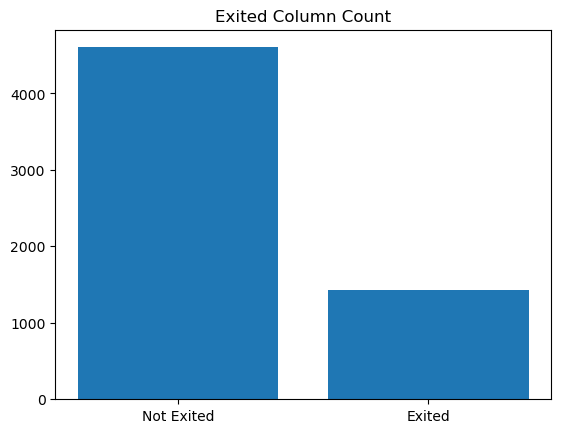

In [27]:
plt.bar(['Not Exited','Exited'],y.value_counts())
plt.title("Exited Column Count")
plt.show()

In [28]:
from imblearn.over_sampling import SMOTE
X_new, y_new = SMOTE().fit_resample(x,y)


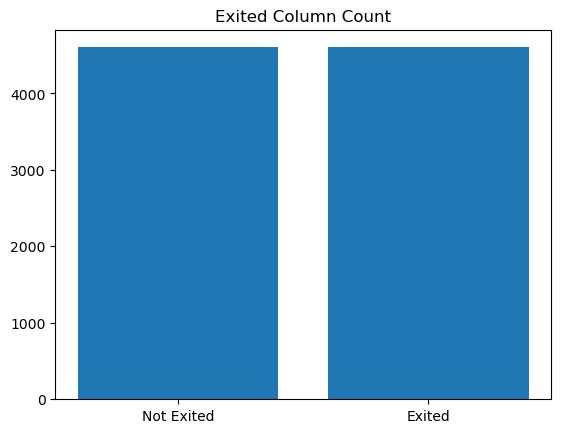

In [29]:
plt.bar(['Not Exited','Exited'], y_new.value_counts())
plt.title("Exited Column Count")
plt.show()

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (7364, 11)
x_test shape:  (1842, 11)
y_train shape:  (7364,)
y_test shape:  (1842,)


In [32]:
x_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
3299,299209.000000,41.000000,3,23.852603,1,1,0,175295.890000,1,0,1
5505,451584.000000,40.000000,4,22.793365,2,1,0,188892.190000,1,0,1
1659,588289.000000,44.000000,2,23.869961,1,1,1,136915.150000,0,0,0
9099,647459.995579,47.118483,5,23.050566,1,0,0,27574.325983,0,0,0
3833,600625.000000,33.000000,1,23.372027,2,1,1,26362.400000,1,0,0


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV

In [34]:
DT= DecisionTreeClassifier(criterion="entropy")
DT.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy')

In [35]:
print(DT.score(x_train,y_train))
print(DT.score(x_test,y_test))
print(DT.predict(x_test))

1.0
0.7953311617806732
[1 0 0 ... 1 0 1]


In [36]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
print(LR.score(x_test,y_test))
print(LR.predict(x_test))

0.5047528517110266
0.508686210640608
[1 1 0 ... 0 0 0]


In [ ]:
SV= SVC(C=10,kernel='linear')
SV.fit(x_train,y_train)
print(SV.score(x_train,y_train))
print(SV.score(x_test,y_test))

In [ ]:
print(SV.predict(x_test))

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)
logreg2=LogisticRegression(C=1,penalty="l2")
logreg2.fit(x_train,y_train)
print("score",logreg2.score(x_test,y_test))

In [ ]:
param_dict={"criterion":['grid','entropy'],
           "max_depth":range(1,10),
           "min_samples_split":range(1,10),
           "min_samples_leaf":range(1,5)}

In [ ]:
grid=GridSearchCV(DT,param_grid=param_dict,cv=10,verbose=1,n_jobs=-1)
grid.fit(x_train,y_train)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

In [ ]:
param_grid = {'C': [0.1, 1], 
              'gamma': [1, 0.1],
              'kernel': ['rbf']} 
  
grid_sv= GridSearchCV(SV, param_grid, refit = True, verbose = 3)
  
grid_sv.fit(x_train, y_train)
print(grid_sv.best_params_)
print(grid_sv.best_estimator_)
print(grid_sv.best_score_)

In [ ]:
models=[('DecisionTree',grid),('SVC',grid_sv),('LogisticRegression',logreg_cv)]
stack=StackingClassifier(models,final_estimator=LogisticRegression(),cv=5)
stack.fit(x_train,y_train)
print(stack.score(x_train,y_train))
print(stack.score(x_test,y_test))

In [ ]:
def rocAuc(stack, x_test, y_test,StackingClassifier ):
    cols = stack.classes_
    y_test_binarized = pd.get_dummies(y_test, prefix=['Class'])
    try:
        score = stack.decision_function(x_test)
    except:
        score = stack.predict_proba(x_test)
    
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(len(stack.classes_)):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized.iloc[:,i],score[:,i])
        roc_auc[i] = auc(fpr[i],tpr[i])
        
    plt.figure(figsize=(7,7))
    for i in range(len(stack.classes_)):
        plt.plot(fpr[i],tpr[i], label=f'{cols[i]}-vs-Rest curve (area = %0.2f)' % roc_auc[i])
    
    plt.plot([0,1],[0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel('True Positive Rate')
    plt.title(f"{model_name} Receiver Operation Characteristic")
    plt.legend(loc='lower right')
    plt.show()